In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/SmartFall Testing.csv')
df.head()

,ms_accelerometer_x,ms_accelerometer_y,ms_accelerometer_z,outcome
0,0.986328,0.210938,-0.105957,0
1,0.977051,0.203125,-0.109375,0
2,0.977051,0.203125,-0.109375,0
3,0.944336,0.191162,-0.107422,0
4,0.808838,0.211670,-0.071045,0


In [ ]:
df.shape

(91025, 4)

In [ ]:
X = df.drop('outcome', axis=1)
y = df['outcome']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Store accuracy and F1-score
    results.append({
        "Model": name,
        "Accuracy": round(acc, 4),
        "Precision": round(report["weighted avg"]["precision"], 4),
        "Recall": round(report["weighted avg"]["recall"], 4),
        "F1-Score": round(report["weighted avg"]["f1-score"], 4)
    })

    print(f"🔹 {name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 60)

# --- Display summary table ---
results_df = pd.DataFrame(results)
print("\n📊 Summary of Model Performance:\n")
print(results_df)

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

🔹 Logistic Regression Accuracy: 0.9431
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     17170
           1       0.00      0.00      0.00      1035

    accuracy                           0.94     18205
   macro avg       0.47      0.50      0.49     18205
weighted avg       0.89      0.94      0.92     18205

------------------------------------------------------------
🔹 Random Forest Accuracy: 0.9522
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17170
           1       0.73      0.25      0.38      1035

    accuracy                           0.95     18205
   macro avg       0.84      0.62      0.68     18205
weighted avg       0.94      0.95      0.94     18205

------------------------------------------------------------
🔹 Decision Tree Accuracy: 0.9254
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     17170
          

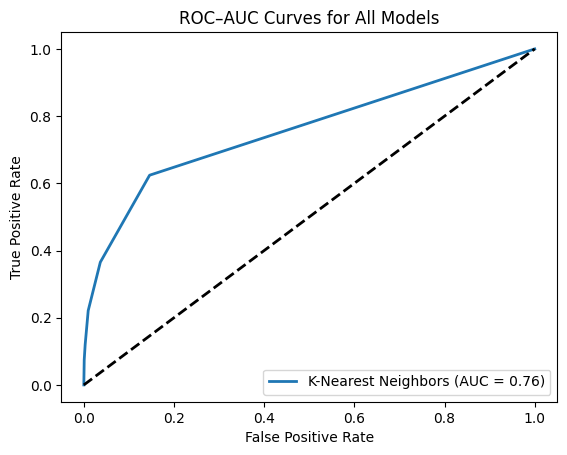

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    roc_curve,
    auc,
    roc_auc_score
)

# Compute ROC values
y_prob = model.predict_proba(X_test)[:, 1]  # Probability for ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)  # <-- fixed indentation
plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.2f})")  # <-- fixed indentation

# --- Plot formatting ---
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC–AUC Curves for All Models')
plt.legend(loc='lower right')
plt.show()


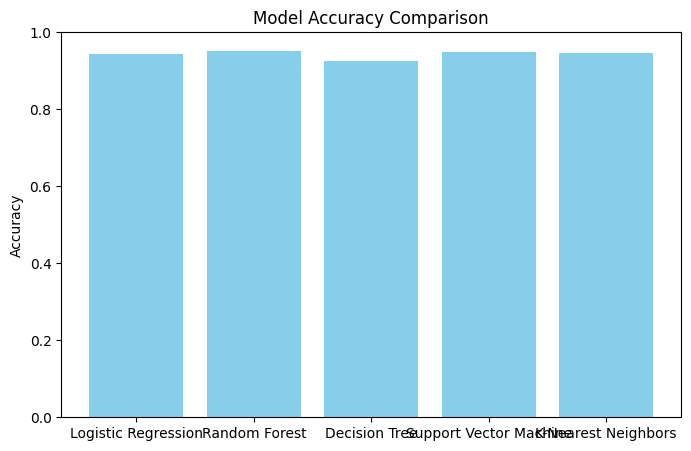

✅ Best Model: Random Forest with Accuracy = 0.9522


In [ ]:
plt.figure(figsize=(8,5))
plt.bar(results_df['Model'], results_df['Accuracy'], color='skyblue')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0,1)
plt.show()

# --- Find best model ---
best_model_row = results_df.loc[results_df['Accuracy'].idxmax()]
print(f"✅ Best Model: {best_model_row['Model']} with Accuracy = {best_model_row['Accuracy']:.4f}")